## Recurrent Neural Networks

Class of Neural Networks designed for processing sequences of data by having connections that form cycles.
This structure enables RNN to maintain a memory of the previous inputs in sequence.

With RNN, we can predict the next word in the sentence, it is important in NLP and when performin time series analysis

p(t) depends on p(t-1), p(t-2)

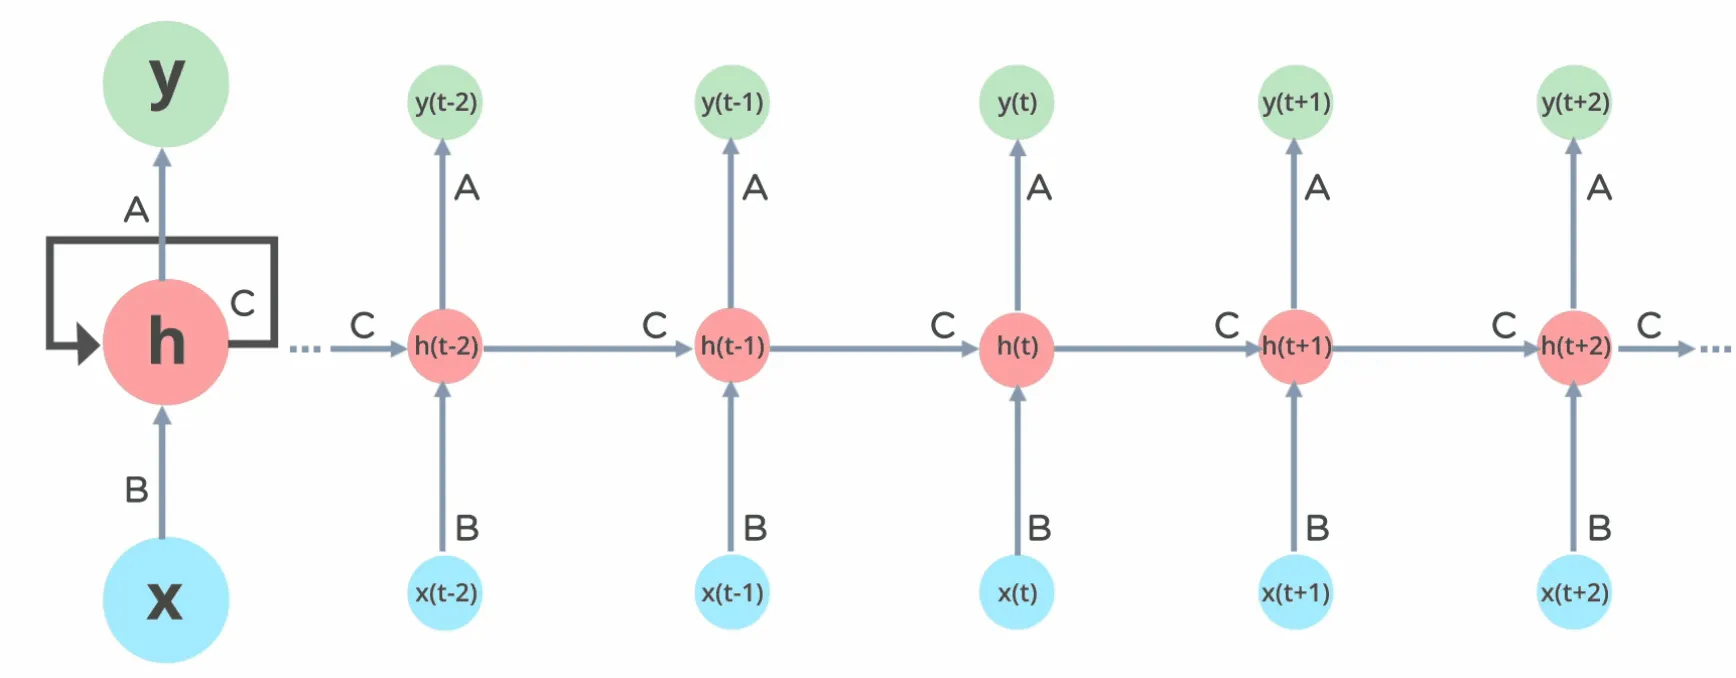


h_t = activation(W_xh * x_t + W_hh * h_{t-1} + b_h)

y_t = W_hy * h_t + b_y

W_xh = weight from input to hidden

W_hh = weight from previous hidden to current hidden

W_hy = weight from hidden to output

b_h, b_y = biases

The gradient function (derivative of the loss function)  involves product of weights from all the layers, as a result of which, we can face 2 problems:

1. Vanishing Gradients
When backpropagating through many time steps, the gradient becomes very small.

Makes it hard to learn long-term dependencies.

2. For Recurrent Neural Networks, the loss function surface is quite complex so it is much hard to find the global optimum as there are a lot of local optimums.  The gradient becomes too large leading to unstable updates during optimization process.

Backpropagation involves repeatedly applying the chain rule:

∂L/∂W = ∂L/∂a_n × ∂a_n/∂a_{n-1} × ... × ∂a_2/∂a_1

So if:

Derivatives < 1 → vanishing

Derivatives > 1 → exploding

| Solution                         | How it helps                                             |
| -------------------------------- | -------------------------------------------------------- |
| **ReLU Activation**            | Gradient doesn't saturate like sigmoid/tanh              |
| **LSTM / GRU**                 | Add memory gates that allow gradient to flow more easily |
| **Batch Normalization**        | Keeps activations in a good range                        |
| **Skip Connections (ResNets)** | Allow gradients to skip layers directly                  |
| **Weight Initialization**      | e.g., Xavier/He initialization keeps variance stable     |


### LSTM AND GRU

Vanilla RNNs struggle with long-term dependencies due to the vanishing gradient problem. To fix this, architectures like LSTM and GRU introduce gates that control information flow, helping the model remember longer and forget less.



Vanilla RNNs struggle with long-term dependencies due to the vanishing gradient problem. To fix this, architectures like LSTM and GRU introduce gates that control information flow, helping the model remember longer and forget less.

LSTM introduces:

- Cell state (C_t): memory that runs through the entire sequence

- Hidden state (h_t): output at each time step

- gates: Forget gate f_t, Input gate i_t, Output gate o_t, Candidate cell state C̃_t

Forget gate decides what to forget from C_{t-1}, Input gate decides what new info to add

Update cell state C_t, Output gate decides what part of C_t to pass to h_t

## RNN Example 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [1]:
num_prev_days = 5
import pandas as pd
df=pd.read_csv('data/daily_min_temp.csv')
df.head()

,Date,Temp
0,01/01/81,20.7
1,01/02/81,17.9
2,01/03/81,18.8
3,01/04/81,14.6
4,01/05/81,15.8


In [3]:
df.shape

(3650, 2)

In [8]:
df.dtypes

Date    object
Temp    object
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_29840\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


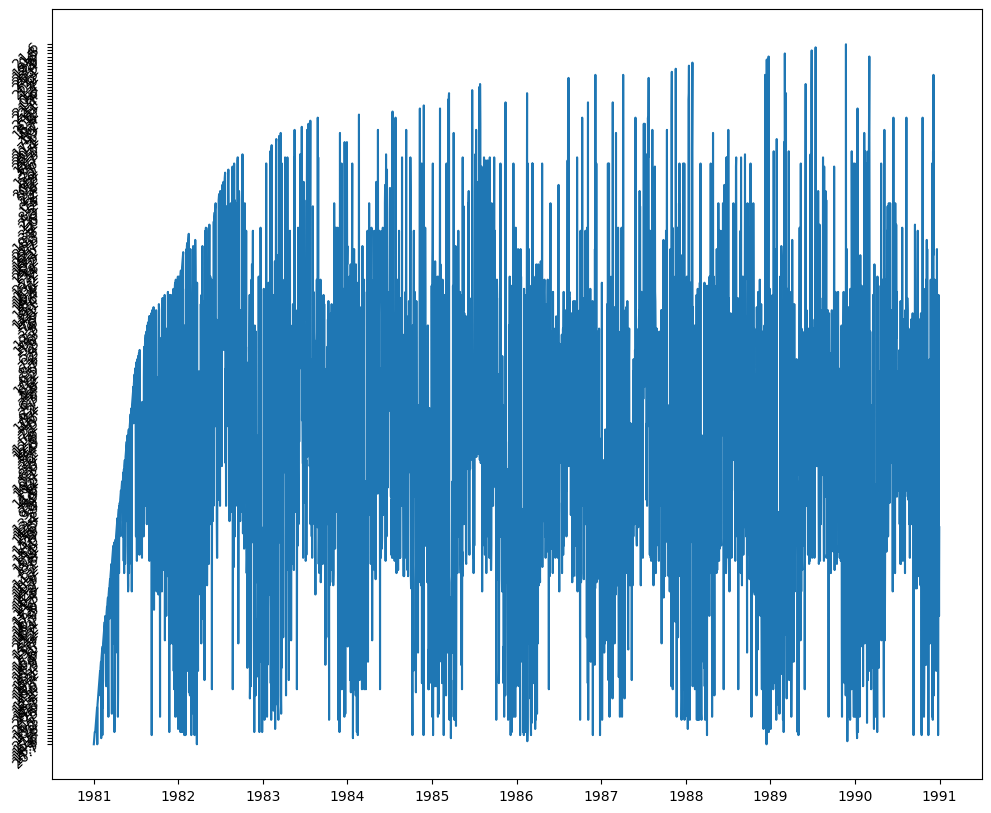

In [12]:
plt.figure(figsize=(12, 10))
plt.yticks(rotation=45)
plt.plot(df['Date'], df['Temp'])
plt.show()